In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples

    trainset = datasets.MNIST('data', train = True, download = True,
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size = train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, download = True,
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [ ]:


class GenericModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(GenericModel, self).__init__()
        self.fc_layers = nn.ModuleList()

        self.fc_layers.append(nn.Linear(input_size, hidden_sizes[0]))

        for i in range(len(hidden_sizes) - 1):
            self.fc_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))


        self.fc_layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.fc_layers[:-1]:
            x = F.relu(layer(x))
        x = self.fc_layers[-1](x)
        return x




In [ ]:

train_loader, test_loader = load_data(50, 100)
epochs = 10

100%|██████████| 9912422/9912422 [00:00<00:00, 148933077.96it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31084345.35it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 57628106.20it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15264846.77it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
def calc_params(model):
    return sum(p.numel() for p in model.parameters())
def define_optimizer(model):
    return optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
def train(model, optimizer, train_loader, loss_fn):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data.view(-1, 784))
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [ ]:
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader, loss_fn)
        train_loss, train_acc = calculate_loss(model, train_loader, loss_fn)
        test_loss, test_acc = calculate_loss(model, test_loader, loss_fn)
    loss_train_arr.append(train_loss)
    loss_test_arr.append(test_loss)
    param_arr.append(calc_params(model))
    print("Model Train loss: ", train_loss)
    print("Model Test loss: ", test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)


In [ ]:
model1 = GenericModel(784, [5, 9], 10)
model2 = GenericModel(784, [25, 50], 10)
model3 = GenericModel(784, [50, 100], 10)
model4 = GenericModel(784, [60, 120], 10)
model5 = GenericModel(784, [100, 200], 10)
model6 = GenericModel(784, [150, 300], 10)
model7 = GenericModel(784, [200, 400], 10)
model8 = GenericModel(784, [250, 500], 10)
model9 = GenericModel(784, [280, 560], 10)
model10 = GenericModel(784, [350, 600], 10)
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []
print("Model 1 parameters: ", (calc_params(model1)))
optimizer = define_optimizer(model1)
compute(model1, optimizer)


torch.manual_seed(1)
print("Model 2 parameters: ", (calc_params(model2)))
optimizer = define_optimizer(model2)
compute(model2, optimizer)


torch.manual_seed(1)
print("Model 3 parameters: ", (calc_params(model3)))
optimizer = define_optimizer(model3)
compute(model3, optimizer)


torch.manual_seed(1)
print("Model 4 parameters: ", (calc_params(model4)))
optimizer = define_optimizer(model4)
compute(model4, optimizer)


torch.manual_seed(1)
print("Model 5 parameters: ", (calc_params(model5)))
optimizer = define_optimizer(model5)
compute(model5, optimizer)

torch.manual_seed(1)
print("Model 6 parameters: ", (calc_params(model6)))
optimizer = define_optimizer(model6)
compute(model6, optimizer)


torch.manual_seed(1)
print("Model 7 parameters: ", (calc_params(model7)))
optimizer = define_optimizer(model7)
compute(model7, optimizer)

torch.manual_seed(1)
print("Model 8 parameters: ", (calc_params(model8)))
optimizer = define_optimizer(model8)
compute(model8, optimizer)


torch.manual_seed(1)
print("Model 9 parameters: ", (calc_params(model9)))
optimizer = define_optimizer(model9)
compute(model9, optimizer)


torch.manual_seed(1)
print("Model 10 parameters: ", (calc_params(model10)))
optimizer = define_optimizer(model10)
compute(model10, optimizer)

Model 1 parameters:  4079
Model Train loss:  tensor(0.5004)
Model Test loss:  tensor(0.4929)
Model 2 parameters:  21435
Model Train loss:  tensor(0.2325)
Model Test loss:  tensor(0.2319)
Model 3 parameters:  45360
Model Train loss:  tensor(0.1641)
Model Test loss:  tensor(0.1699)
Model 4 parameters:  55630
Model Train loss:  tensor(0.1607)
Model Test loss:  tensor(0.1658)
Model 5 parameters:  100710
Model Train loss:  tensor(0.1147)
Model Test loss:  tensor(0.1276)
Model 6 parameters:  166060
Model Train loss:  tensor(0.0822)
Model Test loss:  tensor(0.1012)
Model 7 parameters:  241410
Model Train loss:  tensor(0.0629)
Model Test loss:  tensor(0.0893)
Model 8 parameters:  326760
Model Train loss:  tensor(0.0515)
Model Test loss:  tensor(0.0812)
Model 9 parameters:  382770
Model Train loss:  tensor(0.0445)
Model Test loss:  tensor(0.0760)
Model 10 parameters:  491360
Model Train loss:  tensor(0.0354)
Model Test loss:  tensor(0.0722)


In [11]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i.data.numpy().tolist())

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i.data.numpy().tolist())

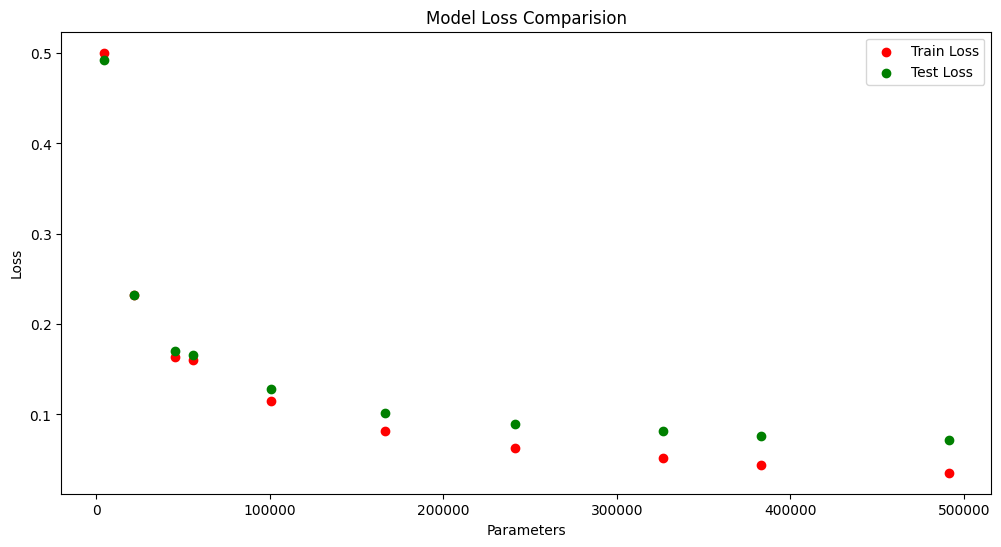

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, temp_1, color = "r")
plt.scatter(param_arr, temp_2, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

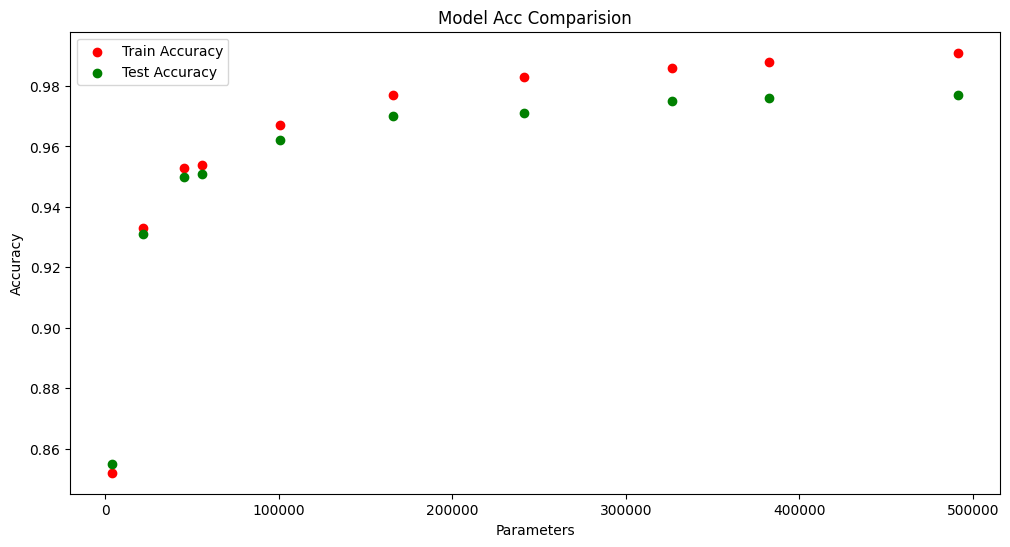

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, train_acc_arr, color = "r")
plt.scatter(param_arr, test_acc_arr, color = "g")
plt.title('Model Acc Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()